Training Accuracy: 100.0 %
Testing Accuracy: 86.27450980392157 %

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        49
           1       0.95      0.77      0.85        53

    accuracy                           0.86       102
   macro avg       0.88      0.87      0.86       102
weighted avg       0.88      0.86      0.86       102



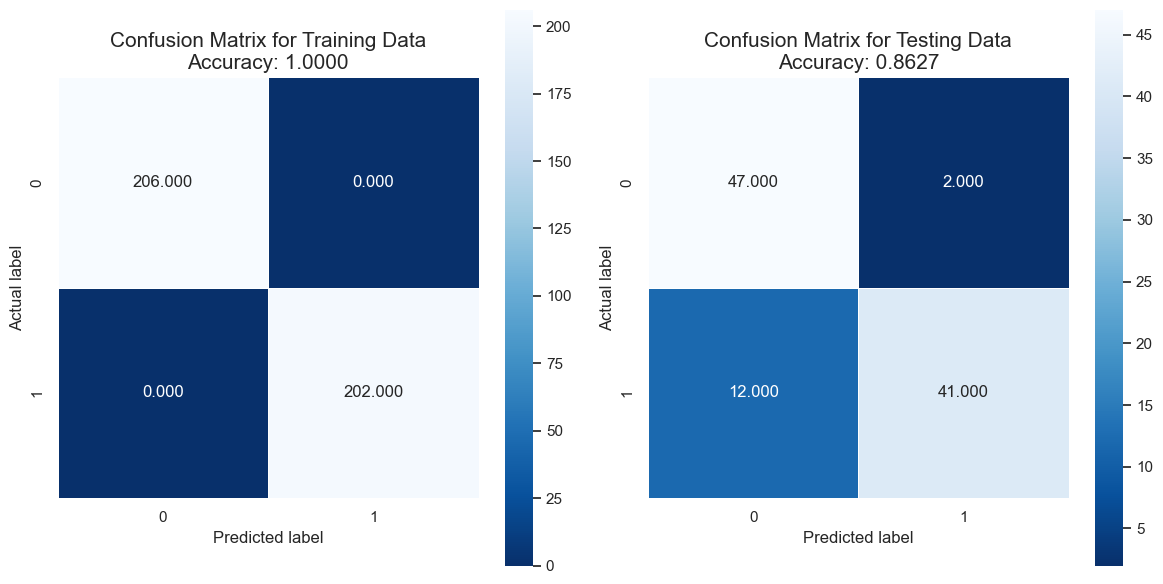

In [ ]:
#No Parameter (Original Hot and Spicy)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"..data/scam_survey_responses.csv"
data = pd.read_csv(file_path)

# Remove the 'Timestamp' column 
data = data.drop(columns=['Timestamp'])

# Rename columns to make them easily referenced
data.columns = [
    "Scammed",
    "Age_Group",
    "Gender",
    "Education_Level",
    "Employment_Status",
    "Income",
    "Internet_Usage_Frequency",
    "Most_Used_Platform",
    "Daily_Online_Hours",
    "Stranger_Interactions",
    "Monthly_Online_Transactions",
    "Active_Social_Media_Accounts",
    "Email_Accounts",
    "Shares_Personal_Info",
    "Different_Passwords",
    "Downloads_From_Untrusted_Sources",
    "Response_To_Suspicious_Contacts",
    "Online_Subscriptions",
    "Reads_Reviews_Before_Buying",
    "Max_Single_Transaction_Spend",
]

# Convert specified columns to numeric (coerce errors into NaN)
columns_to_convert = [
    "Income",
    "Daily_Online_Hours",
    "Monthly_Online_Transactions",
    "Active_Social_Media_Accounts",
    "Email_Accounts",
    "Different_Passwords",
    "Downloads_From_Untrusted_Sources",
    "Online_Subscriptions",
    "Max_Single_Transaction_Spend"
]

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')
data[columns_to_convert] = data[columns_to_convert].fillna(0)

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and label
features = [col for col in data.columns if col != 'Scammed']
X = data[features]
y = data['Scammed']

# Upsample the minority class
majority = data[data['Scammed'] == 1]
minority = data[data['Scammed'] == 0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced_data = pd.concat([majority, minority_upsampled])

X_balanced = balanced_data[features]
y_balanced = balanced_data['Scammed']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100, "%")
print("Testing Accuracy:", test_accuracy * 100, "%")
print("\nClassification Report (Test Set):\n", report)

# Visualize the performance on confusion matrices for both training and testing data
plt.figure(figsize=(12, 6))

# Confusion Matrix for Training Data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(skm.confusion_matrix(y_train, y_train_pred), annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Training Data\nAccuracy: {train_accuracy:.4f}', size=15)

# Confusion Matrix for Testing Data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.heatmap(skm.confusion_matrix(y_test, y_test_pred), annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Testing Data\nAccuracy: {test_accuracy:.4f}', size=15)

# Show the plot
plt.tight_layout()
plt.show()


# Export the cleaned dataset|
cleaned_file_path = r"../data/cleaned_scam_data.csv"
data.to_csv(cleaned_file_path,index=False)

                             Feature  Importance
17       Reads_Reviews_Before_Buying    0.158144
12              Shares_Personal_Info    0.142669
14  Downloads_From_Untrusted_Sources    0.098855
8              Stranger_Interactions    0.065995
7                 Daily_Online_Hours    0.063541
9        Monthly_Online_Transactions    0.058891
18      Max_Single_Transaction_Spend    0.057162
15   Response_To_Suspicious_Contacts    0.056461
16              Online_Subscriptions    0.049736
4                             Income    0.044574
11                    Email_Accounts    0.039362
13               Different_Passwords    0.032878
2                    Education_Level    0.029364
10      Active_Social_Media_Accounts    0.027844
3                  Employment_Status    0.021460
0                          Age_Group    0.019458
6                 Most_Used_Platform    0.012549
1                             Gender    0.010934
5           Internet_Usage_Frequency    0.010123


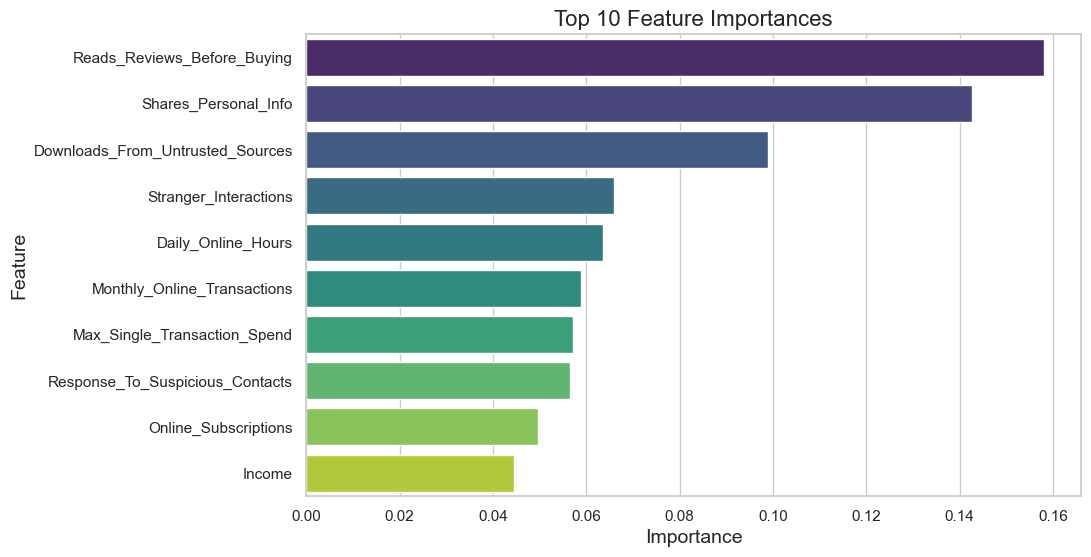

In [408]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 5 features)
top_features = feature_importance_df['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), hue='Feature', legend=False, palette='viridis')

# Add titles and labels
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

In [410]:
# Train the Random Forest model with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_model.score(X_test_selected, y_test)
print(f'Accuracy after feature selection:')


# Make predictions and evaluate the model
y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected )

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100, "%")
print("Testing Accuracy:", test_accuracy * 100, "%")
print("\nClassification Report (Test Set):\n", report)

Accuracy after feature selection:
Training Accuracy: 100.0 %
Testing Accuracy: 89.2156862745098 %

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        49
           1       0.98      0.81      0.89        53

    accuracy                           0.89       102
   macro avg       0.90      0.90      0.89       102
weighted avg       0.91      0.89      0.89       102



                             Feature  Importance
17       Reads_Reviews_Before_Buying    0.192923
12              Shares_Personal_Info    0.144361
14  Downloads_From_Untrusted_Sources    0.095571
8              Stranger_Interactions    0.061923
7                 Daily_Online_Hours    0.060493
9        Monthly_Online_Transactions    0.055908
18      Max_Single_Transaction_Spend    0.052458
4                             Income    0.047579
15   Response_To_Suspicious_Contacts    0.044771
16              Online_Subscriptions    0.041597
13               Different_Passwords    0.036526
11                    Email_Accounts    0.034984
2                    Education_Level    0.029325
10      Active_Social_Media_Accounts    0.028688
0                          Age_Group    0.021907
3                  Employment_Status    0.018354
6                 Most_Used_Platform    0.013540
1                             Gender    0.010967
5           Internet_Usage_Frequency    0.008126


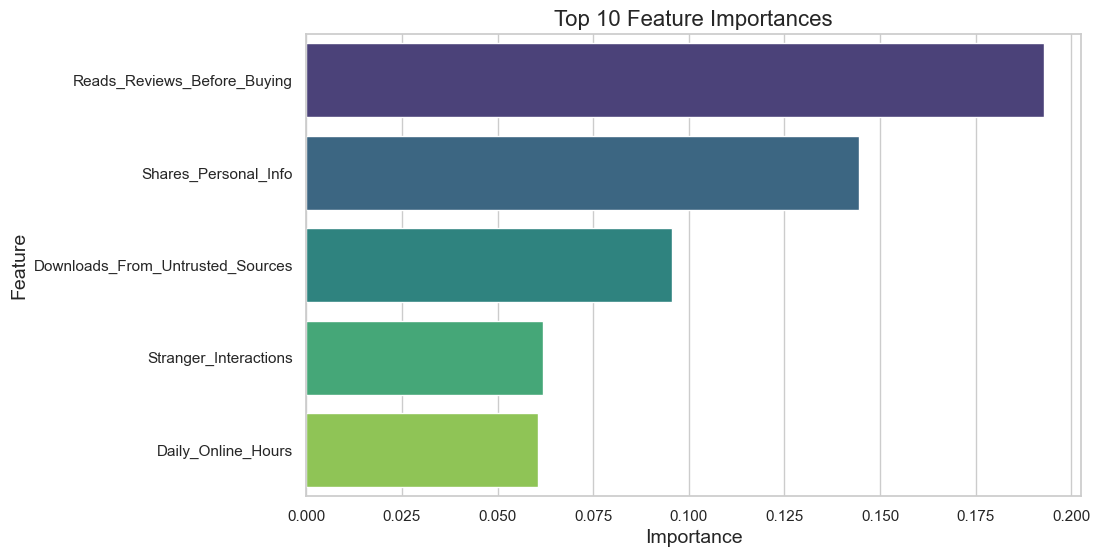

In [422]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 5 features)
top_features = feature_importance_df['Feature'][:5].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5), hue='Feature', legend=False, palette='viridis')

# Add titles and labels
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Train the Random Forest model with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_model.score(X_test_selected, y_test)
print(f'Accuracy after feature selection(Top 5):')

# Make predictions and evaluate the model
y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected )

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100, "%")
print("Testing Accuracy:", test_accuracy * 100, "%")
print("\nClassification Report (Test Set):\n", report)